In [2]:
'''
문제1) https://www.kaggle.com/jyotikumarrout/graduation 의 binary.csv 데이터를 이용하여 
    미국 대학원 입학여부를 분류하는 모델을 작성하시오. 
- loss, accuracy에 대한 시각화도 실시한다.
- input 함수를 사용해 새로운 gre, gpa, rank 값을 받아  admit을 판정하시오.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/binary.csv')
# print(data.head()) # 정상 출력 확인
# data.info()
# print(data['admit'].unique()) # [0 1]
# print(data.isnull().sum()) # 결측치 없음

x = data.drop(['admit'], axis=1)
y = data['admit']
# print(x[:5])
# print(y[:5])

# y 분포 시각화
# sns.countplot(x='admit', data=data, palette='pastel')
# plt.show()
# 레이블 불균형하므로 stratify

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12, shuffle=True, stratify=y)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# (280, 3) (120, 3) (280,) (120,)


In [7]:
# 모델 생성
inputs = Input(shape=(3,))
net1 = Dense(32, activation='relu')(inputs)
batch1 = BatchNormalization()(net1)
drop1 = Dropout(0.5)(batch1)
net2 = Dense(16, activation='relu')(drop1)
batch2 = BatchNormalization()(net2)
drop2 = Dropout(0.5)(batch2)
net3 = Dense(1, activation='sigmoid')(drop2)
model = Model(inputs, net3)

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])

# 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=500, batch_size=8,
          validation_split=0.2, callbacks=[early_stop], verbose=0)

m_eval = model.evaluate(x_test, y_test, verbose=0)

print(f'평가 결과 : 손실 = {m_eval[0]:.4f}, 정확도 = {m_eval[1]*100:.4f}%')

평가 결과 : 손실 = 0.6038, 정확도 = 68.3333%


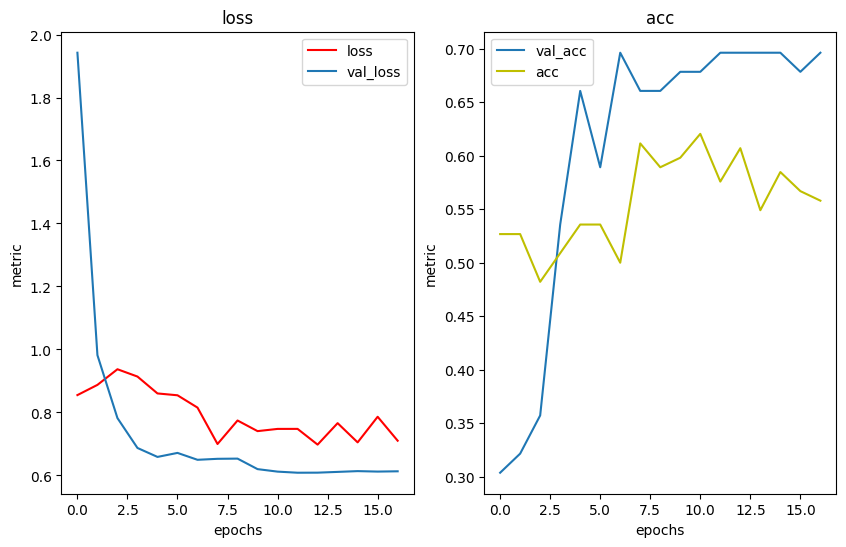

In [6]:
# 시각화
epochs = np.arange(len(history.epoch))

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'], label='loss', color='r')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('metric')
plt.title('loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(epochs, history.history['val_acc'], label='val_acc')
plt.plot(epochs, history.history['acc'], label='acc', color='y')
plt.xlabel('epochs')
plt.ylabel('metric')
plt.title('acc')
plt.legend(loc='best')
plt.show()